# Importing data

In [1]:
import numpy as np
import pandas as pd
data = pd.read_csv('https://techlearn-cdn.s3.amazonaws.com/bs_tinder_clustering/profiles.csv')
data.head()

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,orientation,likes_dog,likes_cat,religion,sex,sign,smokes,sign_matters,speaks,status
0,22,a little extra,anything,socially,never,studying,"asian, white",75.0,-1,transportation,straight,yes,yes,agnosticism,m,gemini,sometimes,NaN,english,single
1,36,average,other,often,sometimes,studying,white,70.0,80000,hospitality,straight,yes,yes,agnosticism,m,cancer,no,NaN,"english, spanish, french",single
2,37,thin,anything,socially,NaN,graduated,NaN,68.0,-1,NaN,straight,no,yes,NaN,m,pisces,no,no,NaN,available
3,22,thin,vegetarian,socially,NaN,studying,white,71.0,20000,student,straight,no,yes,NaN,m,pisces,no,NaN,NaN,single
4,30,athletic,NaN,socially,never,graduated,"asian, black, other",66.0,-1,artist,straight,yes,yes,NaN,m,aquarius,no,NaN,english,single


# Data Analysis

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

## Gender ratio

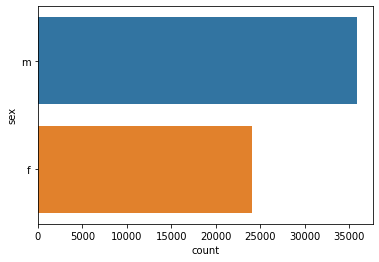

In [3]:
sns.countplot(data=data, y='sex')

## Age distribution of users

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


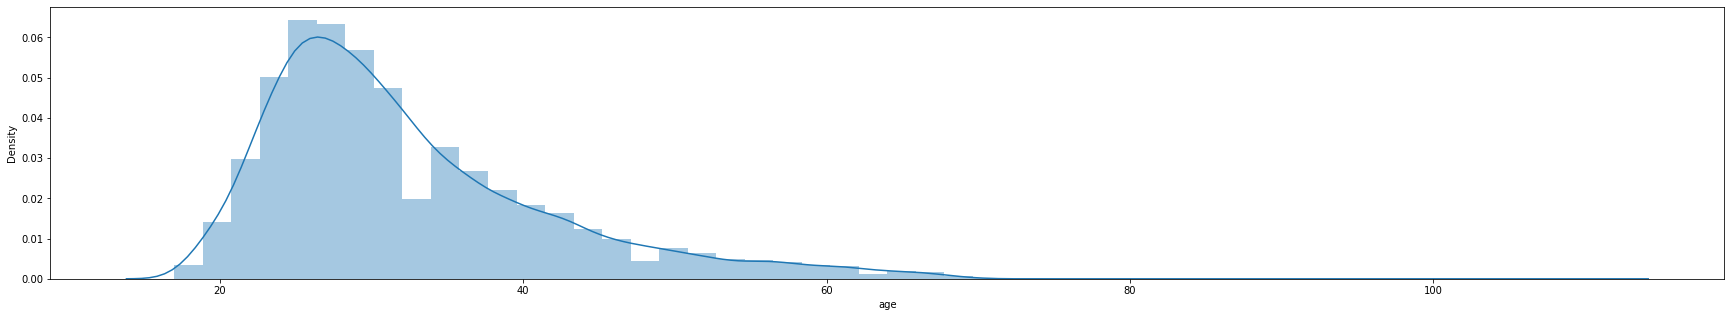

In [4]:
plt.figure(figsize=(30,5))
sns.distplot(data['age'])

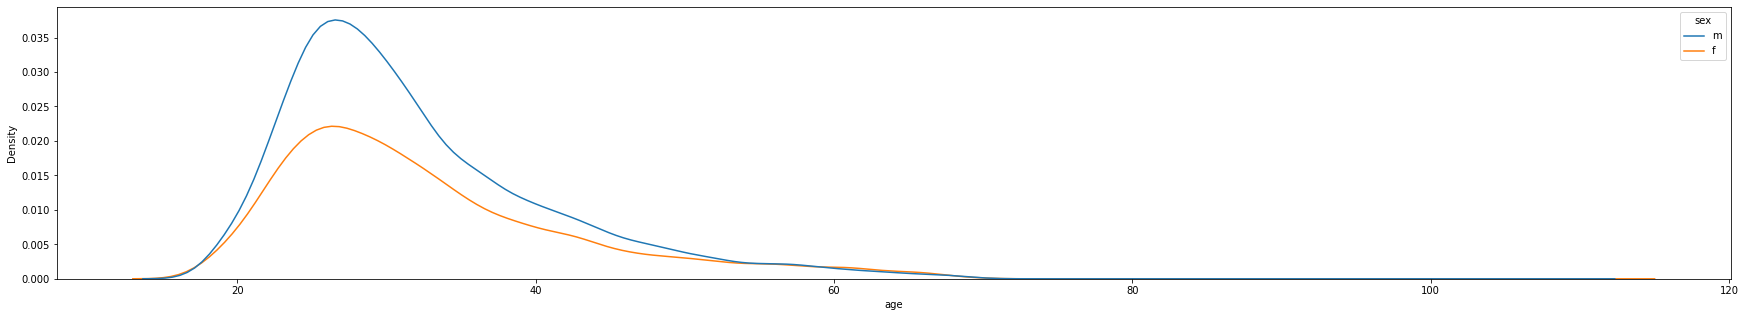

In [5]:
plt.figure(figsize=(30,5))
sns.kdeplot(data=data, x='age', hue='sex')

## Height distribuition of users

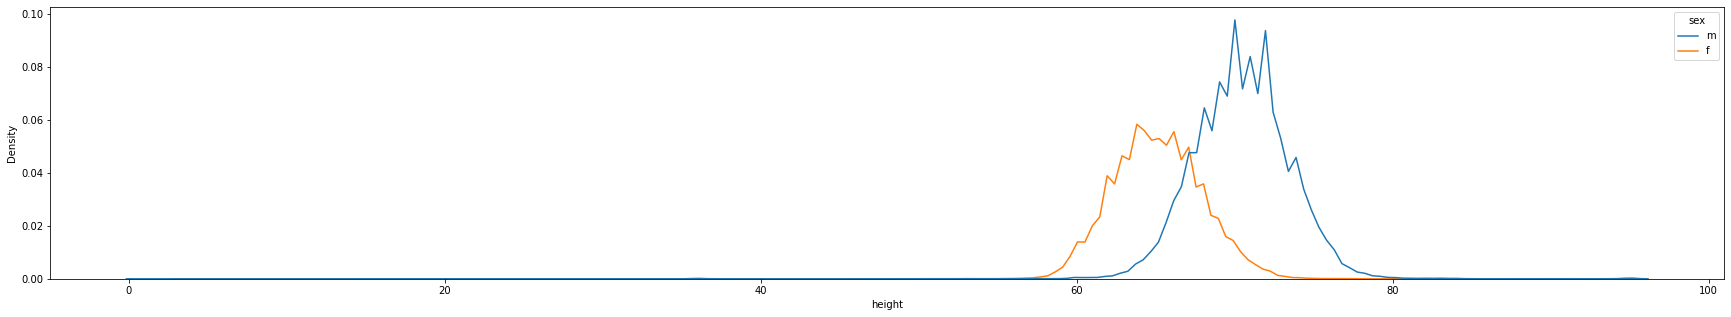

In [6]:
plt.figure(figsize=(30,5))
sns.kdeplot(data=data, x='height', hue='sex')

## Count of drugs, drinks, smokes

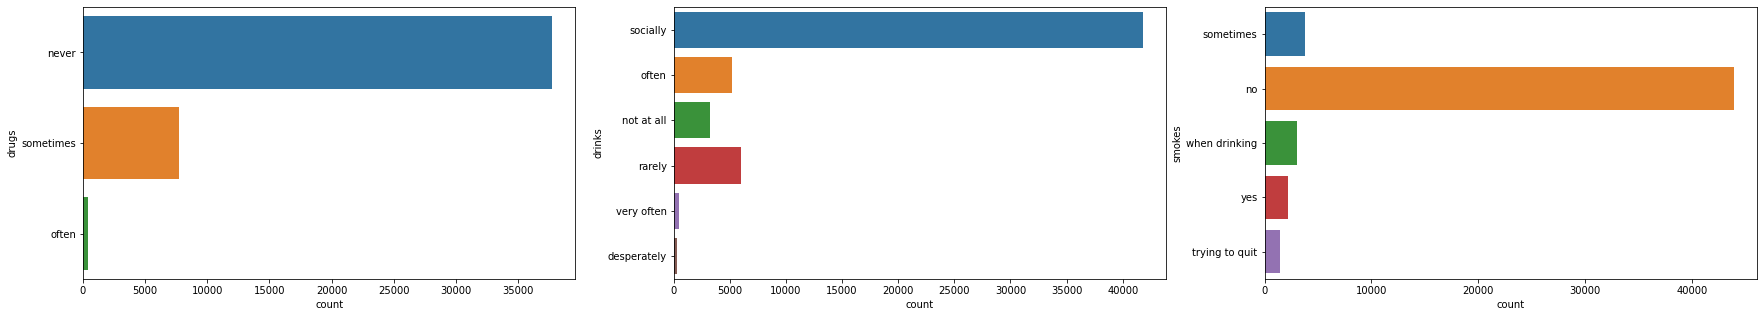

In [7]:
fig, axs = plt.subplots(1,3, figsize=(30,5))
sns.countplot(data=data, y='drugs', ax=axs[0])
sns.countplot(data=data, y='drinks', ax=axs[1])
sns.countplot(data=data, y='smokes', ax=axs[2])

## Relationship status of users 

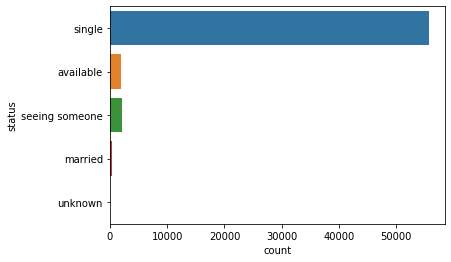

In [8]:
sns.countplot(data=data, y='status')

## Analyzing jobs

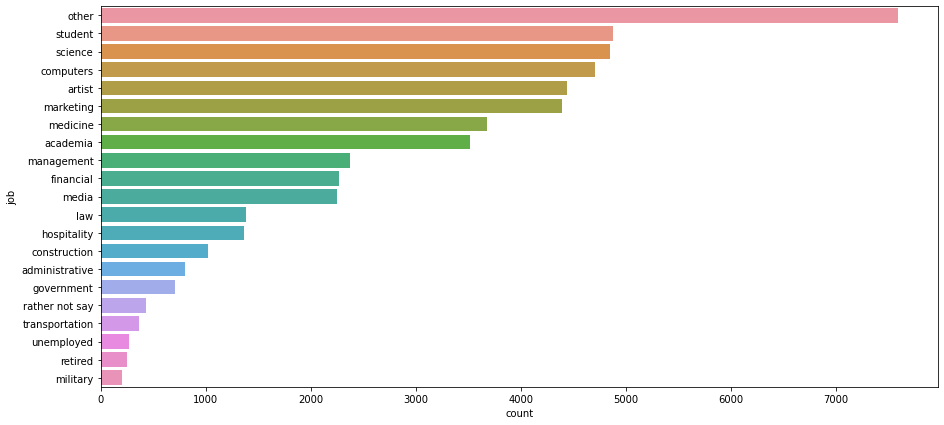

In [9]:
plt.figure(figsize=(15,7))
sns.countplot(data=data, y='job', order=data.job.value_counts().index)
plt.show()

## Analyzing ethnicities

In [10]:
data.ethnicity.unique()

array(['asian, white', 'white', nan, 'asian, black, other',
       'white, other', 'hispanic / latin, white', 'hispanic / latin',
       'pacific islander, white', 'asian', 'black, white',
       'pacific islander', 'asian, native american',
       'asian, pacific islander', 'black, native american, white',
       'middle eastern, other', 'native american, white', 'indian',
       'black', 'black, native american, hispanic / latin, other',
       'black, native american, hispanic / latin',
       'asian, black, pacific islander',
       'asian, middle eastern, black, native american, indian, pacific islander, hispanic / latin, white, other',
       'other', 'hispanic / latin, other', 'asian, black',
       'middle eastern, white', 'native american, white, other',
       'black, native american', 'black, white, other',
       'hispanic / latin, white, other', 'middle eastern', 'black, other',
       'native american, hispanic / latin, white', 'black, indian',
       'indian, white, othe

In [11]:
ethnicities = {}

def update_ethnicities(list_of_ethnicities):
    for ethnicity in list_of_ethnicities:
        if ethnicity.strip() in ethnicities:
            ethnicities[ethnicity.strip()] += 1 
        else:
            ethnicities[ethnicity.strip()] = 0

_ = data.ethnicity.apply(lambda x:  update_ethnicities(x.split(',')) if pd.notna(x) else [] ) 

In [12]:
print(f'Found {len(ethnicities)} ethnicities')

Found 9 ethnicities


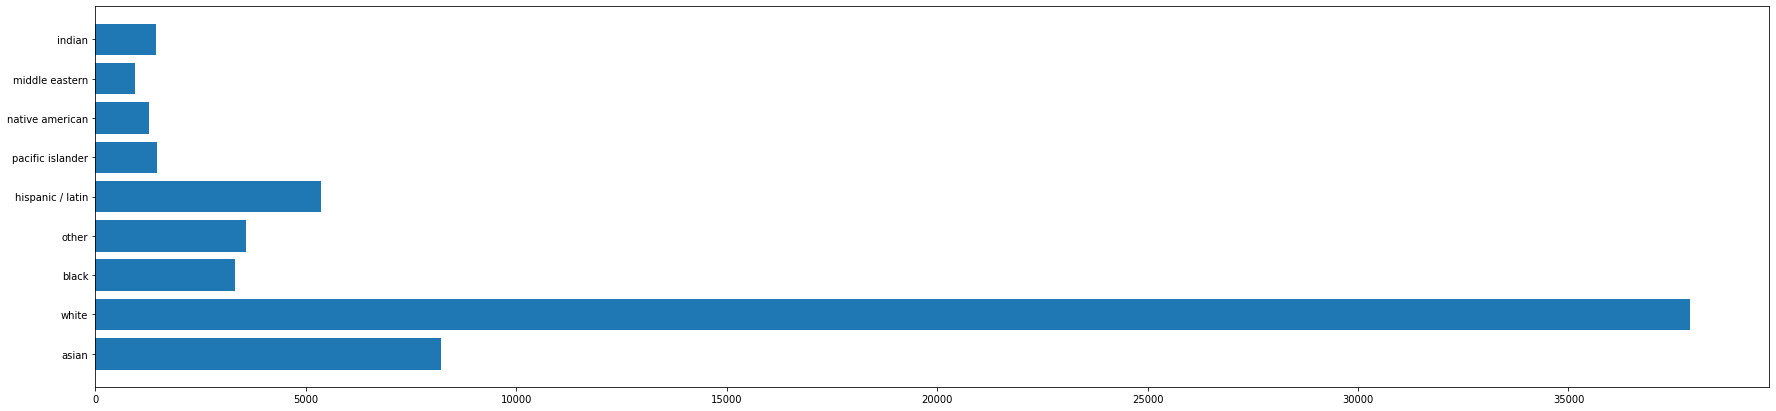

In [13]:
plt.figure(figsize=(30,7))
plt.barh(range(len(ethnicities)), ethnicities.values(), align='center')
plt.yticks(range(len(ethnicities)), ethnicities.keys())
plt.show()

## Analyzing languages

In [14]:
data.speaks.unique()

array(['english', 'english, spanish, french', nan, ...,
       'english, german, russian, hindi',
       'english, spanish, german, tagalog, other',
       'english, spanish, c++, japanese, russian'], dtype=object)

In [15]:
languages = {}

def update_languages(list_of_languages):
    for language in list_of_languages:
        if language.strip() in languages:
            languages[language.strip()] += 1
        else:
            languages[language.strip()] = 0

_ = data.speaks.apply(lambda x:  update_languages(x.split(',')) if pd.notna(x) else [] ) 

In [16]:
print(f'Found {len(languages)} languages')

Found 26 languages


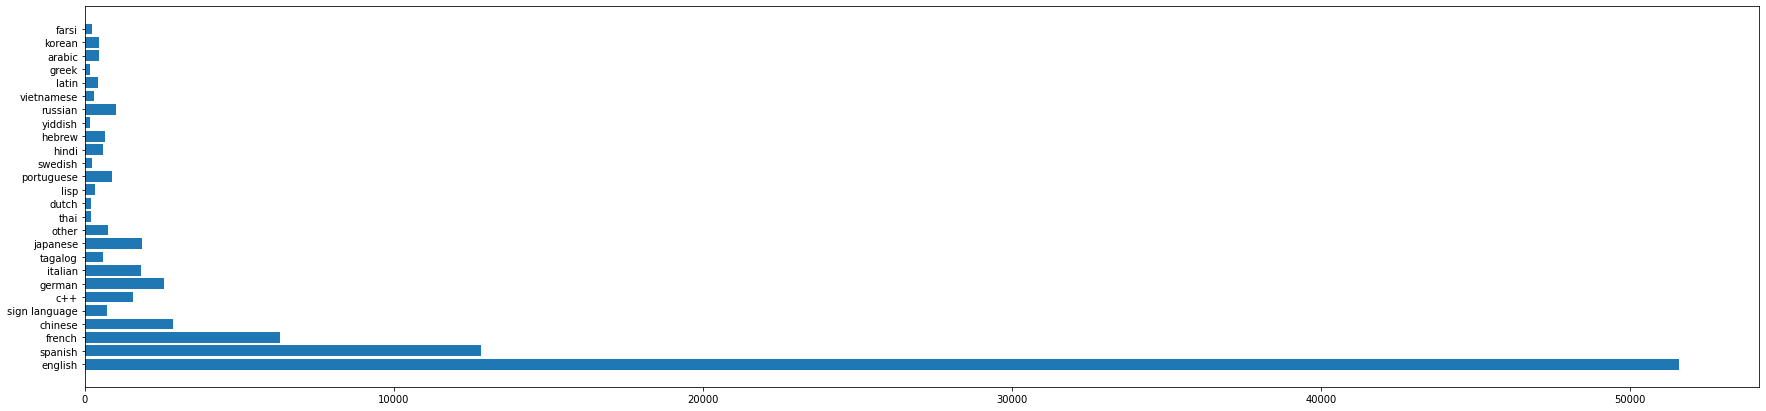

In [17]:
plt.figure(figsize=(30,7))
plt.barh(range(len(languages)), languages.values(), align='center')
plt.yticks(range(len(languages)), languages.keys())
plt.show()

# Data Cleaning

In [18]:
data.isna().sum()

age                 0
body_type        5296
diet            24395
drinks           2985
drugs           14080
education        6628
ethnicity        5680
height              3
income              0
job              8198
orientation         0
likes_dog       19921
likes_cat       19921
religion        20226
sex                 0
sign            11056
smokes           5512
sign_matters    23180
speaks           6417
status              0
dtype: int64

In [19]:
data.dtypes

age               int64
body_type        object
diet             object
drinks           object
drugs            object
education        object
ethnicity        object
height          float64
income            int64
job              object
orientation      object
likes_dog        object
likes_cat        object
religion         object
sex              object
sign             object
smokes           object
sign_matters     object
speaks           object
status           object
dtype: object

In [20]:
data.mode().T

,0
age,27
body_type,average
diet,anything
drinks,socially
drugs,never
education,graduated
ethnicity,white
height,70.0
income,-1
job,other


In [21]:
data.fillna(data.mode().T.to_dict()[0], inplace=True)

In [22]:
data

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,orientation,likes_dog,likes_cat,religion,sex,sign,smokes,sign_matters,speaks,status
0,22,a little extra,anything,socially,never,studying,"asian, white",75.0,-1,transportation,straight,yes,yes,agnosticism,m,gemini,sometimes,can't say,english,single
1,36,average,other,often,sometimes,studying,white,70.0,80000,hospitality,straight,yes,yes,agnosticism,m,cancer,no,can't say,"english, spanish, french",single
2,37,thin,anything,socially,never,graduated,white,68.0,-1,other,straight,no,yes,agnosticism,m,pisces,no,no,english,available
3,22,thin,vegetarian,socially,never,studying,white,71.0,20000,student,straight,no,yes,agnosticism,m,pisces,no,can't say,english,single
4,30,athletic,anything,socially,never,graduated,"asian, black, other",66.0,-1,artist,straight,yes,yes,agnosticism,m,aquarius,no,can't say,english,single
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59941,60,average,anything,socially,never,graduated,white,62.0,-1,marketing,straight,yes,no,catholicism,f,cancer,no,can't say,english,single
59942,24,fit,anything,often,sometimes,studying,"white, other",72.0,-1,media,straight,yes,yes,agnosticism,m,leo,no,no,english,single
59943,41,average,anything,not at all,never,graduated,asian,71.0,100000,construction,straight,yes,yes,christianity,m,sagittarius,no,no,english,single
59944,26,athletic,anything,socially,often,studying,"asian, black",73.0,-1,medicine,straight,yes,yes,agnosticism,m,leo,trying to quit,can't say,"english, spanish, chinese, japanese, korean",single


# Feature Engineering

In [23]:
for col in data.columns:
    print(f'{col} have {data[col].nunique()} values')
    #print(col+"have"+data[col].nunique()+"values")

age have 56 values
body_type have 12 values
diet have 6 values
drinks have 6 values
drugs have 3 values
education have 3 values
ethnicity have 217 values
height have 60 values
income have 13 values
job have 21 values
orientation have 3 values
likes_dog have 2 values
likes_cat have 2 values
religion have 9 values
sex have 2 values
sign have 12 values
smokes have 5 values
sign_matters have 3 values
speaks have 1318 values
status have 5 values


## Label Encoding

In [24]:
from sklearn.preprocessing import LabelEncoder

label_encoded_columns = ['body_type', 'diet', 'drinks', 'drugs', 'education', 'income', 'job', 'orientation', 'likes_dog', 'likes_cat', 'religion', 'sex', 'sign', 'sign_matters', 'smokes', 'status']
label_encoders = {}
for col in label_encoded_columns:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

In [25]:
data

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,orientation,likes_dog,likes_cat,religion,sex,sign,smokes,sign_matters,speaks,status
0,22,0,0,4,0,2,"asian, white",75.0,0,19,2,1,1,0,1,4,1,0,english,3
1,36,2,3,2,2,2,white,70.0,7,7,2,1,1,0,1,2,0,0,"english, spanish, french",3
2,37,10,0,4,0,1,white,68.0,0,14,2,0,1,0,1,7,0,1,english,0
3,22,10,5,4,0,2,white,71.0,1,18,2,0,1,0,1,7,0,0,english,3
4,30,1,0,4,0,1,"asian, black, other",66.0,0,2,2,1,1,0,1,0,0,0,english,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59941,60,2,0,4,0,1,white,62.0,0,10,2,1,0,3,0,2,0,0,english,3
59942,24,4,0,2,2,2,"white, other",72.0,0,11,2,1,1,0,1,5,0,1,english,3
59943,41,2,0,1,0,1,asian,71.0,8,4,2,1,1,4,1,8,0,1,english,3
59944,26,1,0,4,1,2,"asian, black",73.0,0,12,2,1,1,0,1,5,2,0,"english, spanish, chinese, japanese, korean",3


## Generating ethnicity columns

In [26]:
def get_ethnicities_columns(x):
    x = x.split(', ')
    y = dict.fromkeys(ethnicities.keys(), 0)
    for ethnicity in y.keys():
        if ethnicity in x:
            y[ethnicity] = 1
    return pd.Series(y.values(), index=y.keys())

In [31]:
ethnicities_column_names = ['ethnicity_'+key for key in ethnicities.keys()] 
data[ethnicities_column_names] = data.ethnicity.apply(lambda x: get_ethnicities_columns(x) if pd.notna(x) else np.nan)

In [32]:
print(ethnicities_column_names)
print(data[ethnicities_column_names])

['ethnicity_asian', 'ethnicity_white', 'ethnicity_black', 'ethnicity_other', 'ethnicity_hispanic / latin', 'ethnicity_pacific islander', 'ethnicity_native american', 'ethnicity_middle eastern', 'ethnicity_indian']
       ethnicity_asian  ethnicity_white  ethnicity_black  ethnicity_other  \
0                    1                1                0                0   
1                    0                1                0                0   
2                    0                1                0                0   
3                    0                1                0                0   
4                    1                0                1                1   
...                ...              ...              ...              ...   
59941                0                1                0                0   
59942                0                1                0                1   
59943                1                0                0                0   
59944           

In [34]:
data

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,...,status,ethnicity_asian,ethnicity_white,ethnicity_black,ethnicity_other,ethnicity_hispanic / latin,ethnicity_pacific islander,ethnicity_native american,ethnicity_middle eastern,ethnicity_indian
0,22,0,0,4,0,2,"asian, white",75.0,0,19,...,3,1,1,0,0,0,0,0,0,0
1,36,2,3,2,2,2,white,70.0,7,7,...,3,0,1,0,0,0,0,0,0,0
2,37,10,0,4,0,1,white,68.0,0,14,...,0,0,1,0,0,0,0,0,0,0
3,22,10,5,4,0,2,white,71.0,1,18,...,3,0,1,0,0,0,0,0,0,0
4,30,1,0,4,0,1,"asian, black, other",66.0,0,2,...,3,1,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59941,60,2,0,4,0,1,white,62.0,0,10,...,3,0,1,0,0,0,0,0,0,0
59942,24,4,0,2,2,2,"white, other",72.0,0,11,...,3,0,1,0,1,0,0,0,0,0
59943,41,2,0,1,0,1,asian,71.0,8,4,...,3,1,0,0,0,0,0,0,0,0
59944,26,1,0,4,1,2,"asian, black",73.0,0,12,...,3,1,0,1,0,0,0,0,0,0


## Generating language columns

In [35]:
def get_languages_columns(x):
    x = x.split(', ')
    y = dict.fromkeys(languages.keys(), 0)
    for language in y.keys():
        if language in x:
            y[language] = 1
    return pd.Series(y.values(), index=y.keys())

In [36]:
languages_column_names = ['speak_'+key for key in languages.keys()] 
data[languages_column_names] = data.speaks.apply(lambda x: get_languages_columns(x) if pd.notna(x) else np.nan)

In [37]:
data.drop(columns=['ethnicity','speaks'], inplace=True)

In [38]:
data.shape

(59946, 53)

# Dimensionality Reduction

In [39]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(data)

In [40]:
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(X_std)

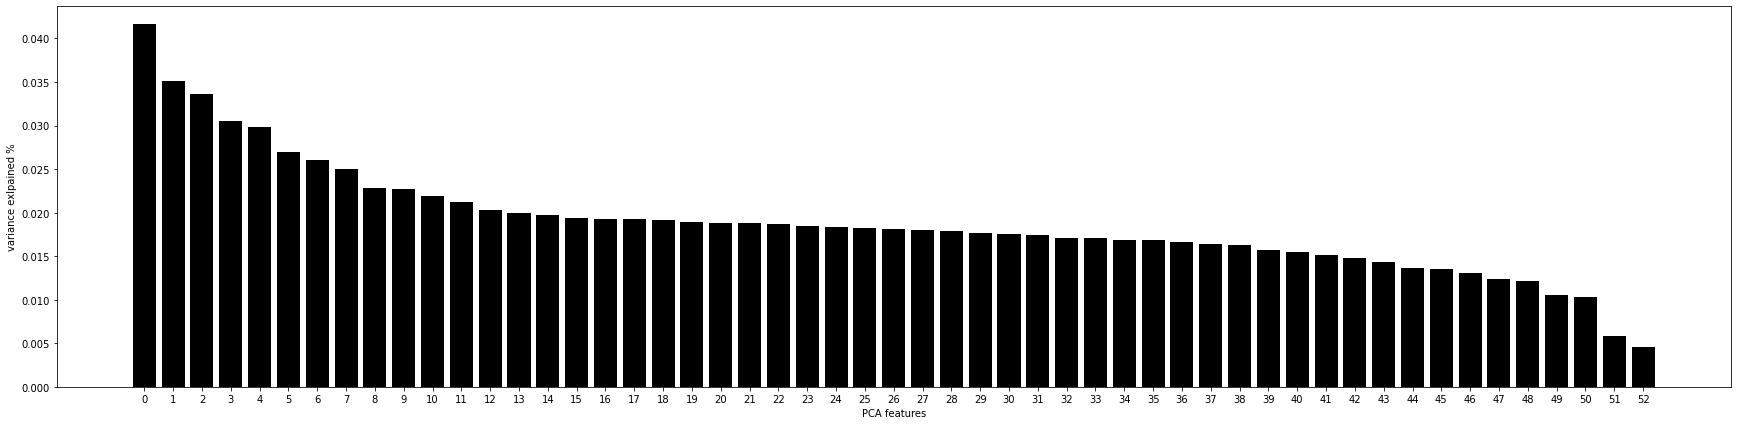

In [41]:
features = range(pca.n_components_)
plt.figure(figsize=(30,7))
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance exlpained %')
plt.xticks(features)
plt.show()

In [ ]:
pca.explained_variance_ratio_, pca.explained_variance_ratio_.cumsum()

(array([4.60702550e-02, 4.06407301e-02, 3.67307623e-02, 3.51639831e-02,
        3.19257509e-02, 2.87225506e-02, 2.58909808e-02, 2.54381615e-02,
        2.45062442e-02, 2.42277076e-02, 2.36021500e-02, 2.33426063e-02,
        2.30879378e-02, 2.28918267e-02, 2.25890848e-02, 2.24639494e-02,
        2.24496574e-02, 2.23455168e-02, 2.22170484e-02, 2.21340515e-02,
        2.18616147e-02, 2.17182891e-02, 2.16729599e-02, 2.14389582e-02,
        2.13736078e-02, 2.11811972e-02, 2.10130687e-02, 2.06596145e-02,
        2.04433444e-02, 2.01639879e-02, 2.00234790e-02, 1.98365749e-02,
        1.97182789e-02, 1.95354357e-02, 1.92367354e-02, 1.85210881e-02,
        1.83934490e-02, 1.80297376e-02, 1.76903799e-02, 1.74191200e-02,
        1.60365965e-02, 1.58509759e-02, 1.44207722e-02, 7.31977939e-03,
        8.97614024e-33, 9.96908715e-34, 7.71268649e-34, 3.33668291e-34,
        3.33668291e-34, 3.33668291e-34, 3.33668291e-34, 1.52025726e-34,
        7.50287966e-35]),
 array([0.04607025, 0.08671099, 0.1234

In [ ]:
PCA_components = pd.DataFrame(principalComponents)

# Clustering

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
ks = range(2, 101, 2)
inertias = []
for k in ks:
    print(f'Finding {k} clusters')
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:42])
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

Finding 2 clusters
Finding 4 clusters
Finding 6 clusters
Finding 8 clusters
Finding 10 clusters
Finding 12 clusters
Finding 14 clusters
Finding 16 clusters
Finding 18 clusters
Finding 20 clusters
Finding 22 clusters
Finding 24 clusters
Finding 26 clusters
Finding 28 clusters
Finding 30 clusters
Finding 32 clusters
Finding 34 clusters
Finding 36 clusters
Finding 38 clusters
Finding 40 clusters
Finding 42 clusters
Finding 44 clusters
Finding 46 clusters
Finding 48 clusters
Finding 50 clusters
Finding 52 clusters
Finding 54 clusters
Finding 56 clusters
Finding 58 clusters
Finding 60 clusters
Finding 62 clusters
Finding 64 clusters
Finding 66 clusters
Finding 68 clusters
Finding 70 clusters
Finding 72 clusters
Finding 74 clusters
Finding 76 clusters
Finding 78 clusters
Finding 80 clusters
Finding 82 clusters
Finding 84 clusters
Finding 86 clusters
Finding 88 clusters
Finding 90 clusters
Finding 92 clusters
Finding 94 clusters
Finding 96 clusters
Finding 98 clusters
Finding 100 clusters


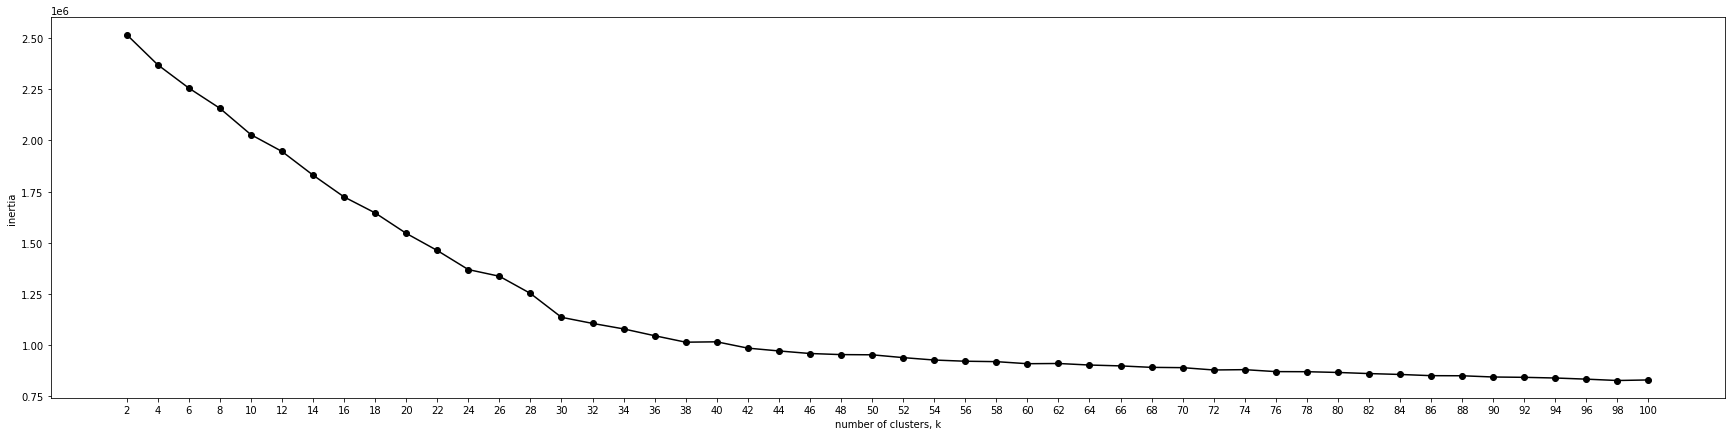

In [ ]:
plt.figure(figsize=(30,7))
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [ ]:
model = KMeans(n_clusters=30)
model.fit(PCA_components.iloc[:,:42])
data['cluster'] = model.predict(PCA_components.iloc[:,:42])

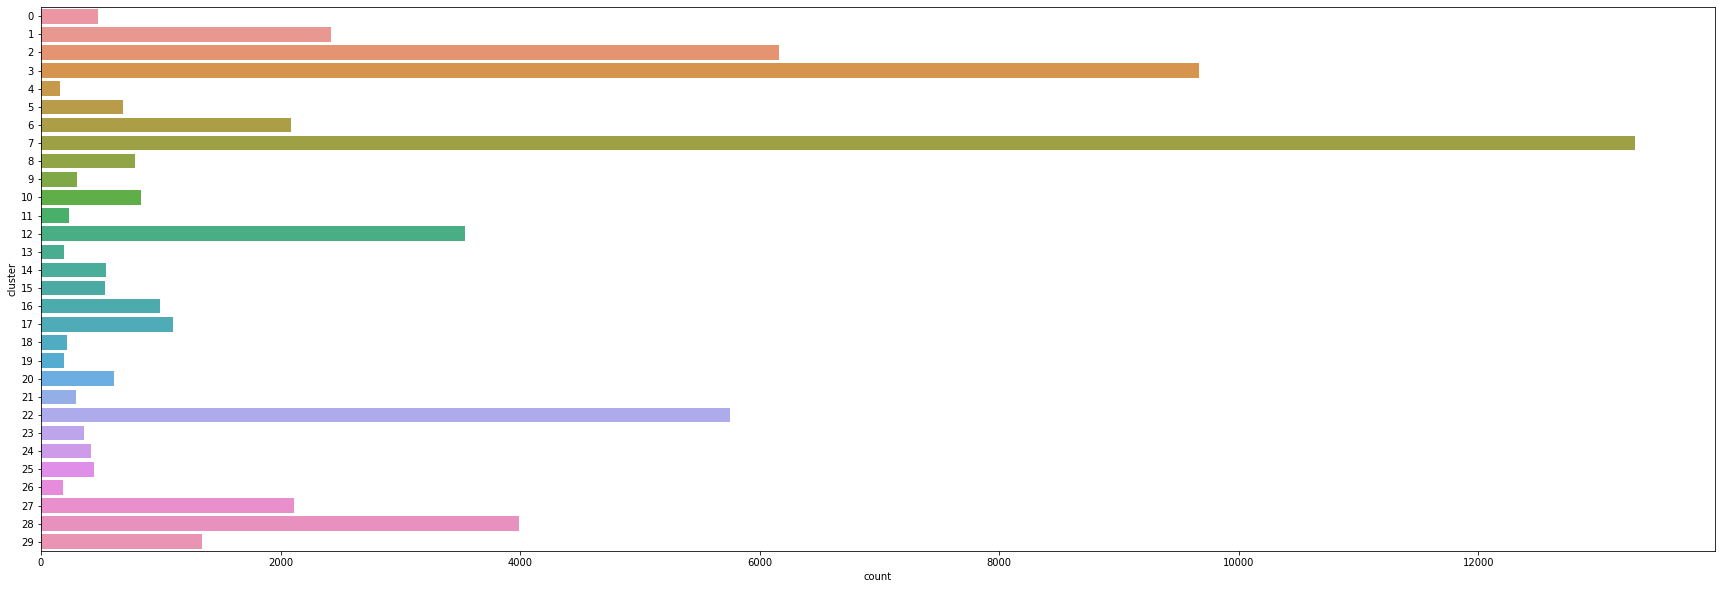

In [ ]:
plt.figure(figsize=(30,10))
sns.countplot(data=data, y='cluster')
plt.show()

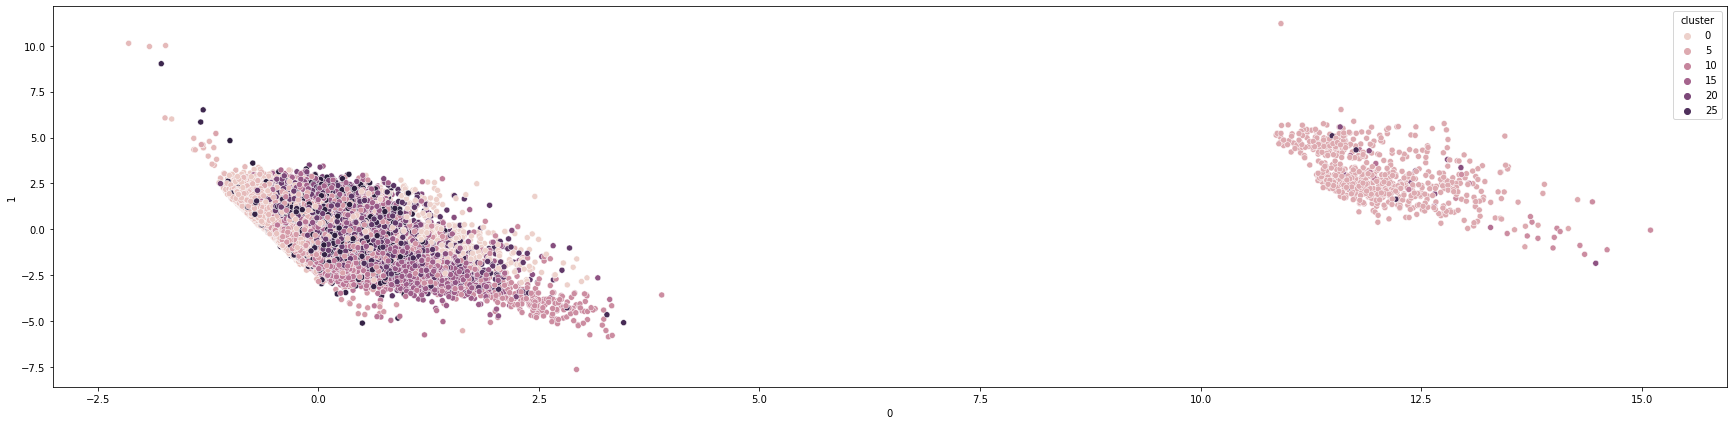

In [ ]:
plt.figure(figsize=(30,7))
sns.scatterplot(x=PCA_components[0], y=PCA_components[1], hue=data['cluster'])
plt.show()